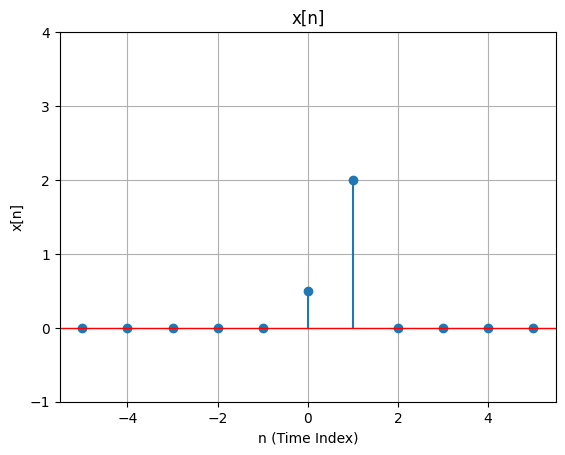

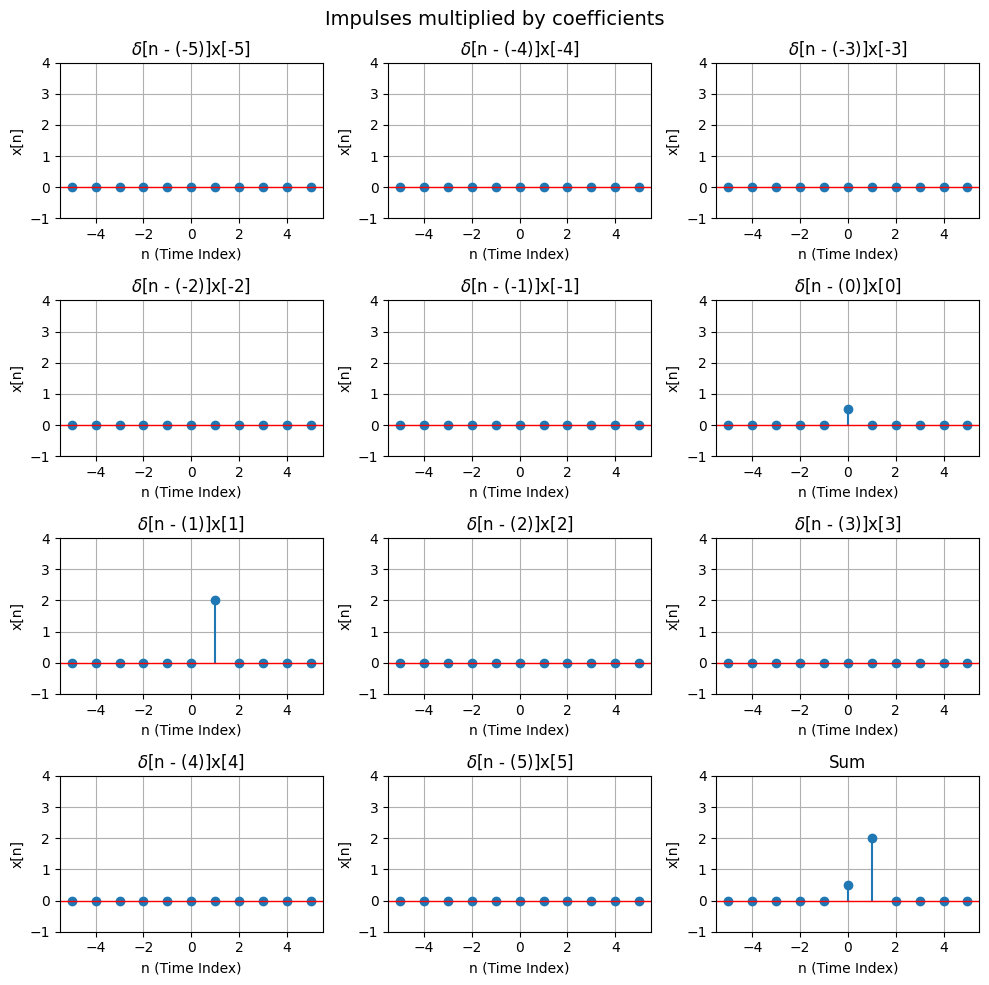

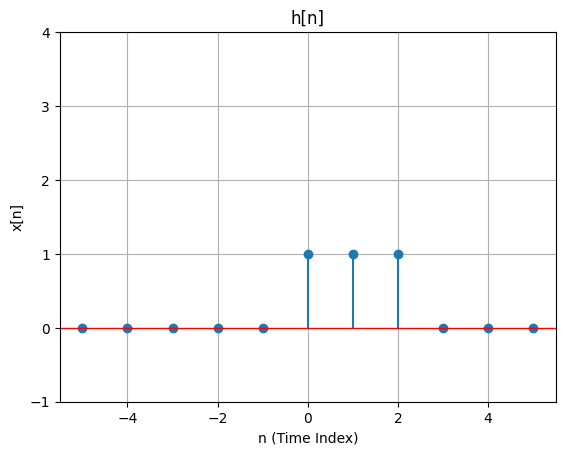

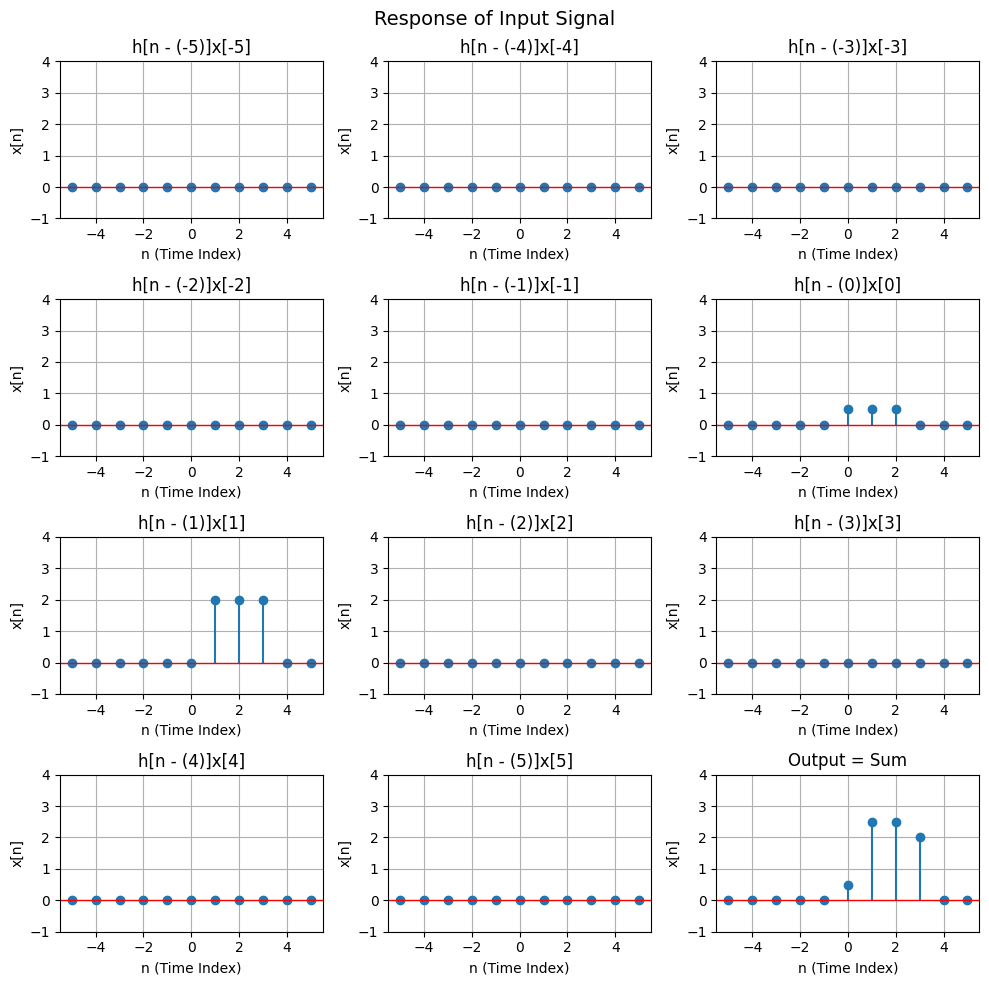

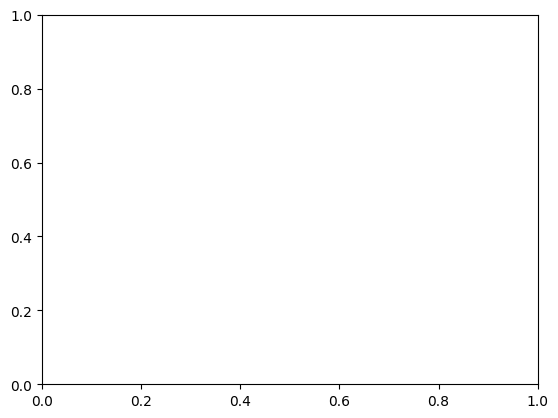

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
class DiscreteSignal:
    def __init__(self, INF):
        self.INF = INF
        self.values = np.zeros(2 * INF + 1)  # Signal values are initialized to zero

    def set_value_at_time(self, time, value):
        index = time + self.INF  # Shift time to handle negative indices
        if 0 <= index < len(self.values):
            self.values[index] = value
        # else:
        #     raise ValueError("Time index is out of range.")

    def shift_signal(self, shift):
        # """Return a new signal instance with a shifted signal x[n - shift]."""
        new_signal = DiscreteSignal(self.INF)
        for i in range(-self.INF, self.INF + 1):
            index = i+shift
            if -self.INF <= index <= self.INF:
                new_signal.set_value_at_time(i, self.values[index + self.INF])
        return new_signal

    def add(self, other):
        # """Add two discrete signals and return the result."""
        if len(self.values) != len(other.values):
            raise ValueError("Signals must have the same length.")
        new_signal = DiscreteSignal(self.INF)
        new_signal.values = self.values + other.values
        return new_signal

    def multiply(self, other):
        # """Multiply two discrete signals element-wise and return the result."""
        if len(self.values) != len(other.values):
            raise ValueError("Signals must have the same length.")
        new_signal = DiscreteSignal(self.INF)
        new_signal.values = self.values * other.values
        return new_signal

    def multiply_const_factor(self, scaler):
        # """Multiply the signal by a constant factor and return the result."""
        new_signal = DiscreteSignal(self.INF)
        new_signal.values = self.values * scaler
        return new_signal

    def plot(self, ax, title="Discrete Signal",low=-1,high=4,filepath=None):
        time = np.arange(-self.INF, self.INF + 1)
        ax.stem(time, self.values, basefmt=" ")
        ax.set_title(title)
        ax.set_xlabel('n (Time Index)')
        ax.set_ylabel('x[n]')
        ax.set_ylim(low,high)
        ax.axhline(0, color='red', linestyle='-', linewidth=1.0)
        ax.grid(True)
        if filepath:
            plt.savefig(filepath)
            # print(f"Plot saved at: {filepath}")


class DiscreteLTI:
    def __init__(self,impulse_response):
        self.impulse_response = impulse_response
    def linear_combination_of_impulses(self,input_signal):
        impulses = []
        coefficients = []
        for n,value in enumerate(input_signal.values):
            # if value!=0:
            impulse = DiscreteSignal(input_signal.INF)
            impulse.set_value_at_time(n-input_signal.INF,value!=0)
            # impulse.plot()
            impulses.append(impulse)
            coefficients.append(value)
        # for i in range(-input_signal.INF,input_signal.INF+1):
        #     if input_signal[i+input_signal.INF]!=0:
        #         impulse = DiscreteSignal(input_signal.INF)
        #         impulse.set_value_at_time(i,1)
        #         # impulse.plot()
        #         impulses.append(impulse)
        #         coefficients.append(input_signal.values[i+input_signal.INF])
        return impulses,coefficients
    
    def output(self, input_signal):
        impulses, coefficients = self.linear_combination_of_impulses(input_signal)
        output_signal = DiscreteSignal(input_signal.INF)
        totalplots = 2*input_signal.INF+2
        rows = totalplots//3
        fig, axes = plt.subplots(rows,totalplots//rows, figsize=(10, 10))
        fig.suptitle("Response of Input Signal", fontsize=14)
        # loopi=0
        
        for i, (impulse, ax) in enumerate(zip(impulses, axes.flat[:-1])):  # Skip the last subplot for sum
            shifted_impulse = self.impulse_response.shift_signal(input_signal.INF - i)
            to_plot = shifted_impulse.multiply_const_factor(coefficients[i])
            title = f'h[n - ({i - input_signal.INF})]x[{i - input_signal.INF}]'
            to_plot.plot(ax, title,-1,input_signal.values.max()+2)

            output_signal = output_signal.add(to_plot)
            # loopi+=1
        
        # Plot the sum signal in the last subplot
        # print(loopi)
        sumt = f'Output = Sum'
        output_signal.plot(axes.flat[-1], sumt)

        plt.tight_layout()
        plt.savefig(os.path.join("discrete_signals", "Response_of_Input_Signal.png"))
        
        # plt.show()
        
        return output_signal
def main():
    impulse_response = DiscreteSignal(5)
    impulse_response.set_value_at_time(0, 1)
    impulse_response.set_value_at_time(1, 1)
    impulse_response.set_value_at_time(2, 1)

    output_dir = "discrete_signals"
    os.makedirs(output_dir, exist_ok=True)

    input_signal = DiscreteSignal(5)
    lti = DiscreteLTI(impulse_response)
    input_signal.set_value_at_time(0, 0.5)
    input_signal.set_value_at_time(1, 2)
    # Plot Input Signal
    fig, ax = plt.subplots()  # Create another figure and axis
    input_signal.plot(ax, "x[n]",-1,input_signal.values.max()+2, filepath=os.path.join(output_dir, "x[n].png"))  # Pass the axis to the plot method
    
    impulse = DiscreteSignal(5)
    impulse.set_value_at_time(0,1)

    totalplots = 2*input_signal.INF+2
    rows = totalplots//3
    fig, axes = plt.subplots(rows,totalplots//rows, figsize=(10, 10))
    fig.suptitle("Impulses multiplied by coefficients", fontsize=14)
    # impulse.plot(ax,"impulse")
    for i, ax in enumerate(axes.flat[:-1]):
        shifted_impulse = impulse.shift_signal(input_signal.INF - i)
        to_plot = shifted_impulse.multiply_const_factor(input_signal.values[i])
        title = rf'$\delta$[n - ({i - input_signal.INF})]x[{i - input_signal.INF}]'
        to_plot.plot(ax, title,-1,input_signal.values.max()+2)
    input_signal.plot(axes.flat[-1], "Sum")
    
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, "impulse_multiplied_by_coeff.png"))
    # plt.show()
    
    fig, ax = plt.subplots()  # Create a new figure and axis
    
    impulse_response.plot(ax, "h[n]",-1,input_signal.values.max()+2, filepath=os.path.join(output_dir, "h[n].png"))  # Pass the axis to the plot method

    

    # Plot Output Signal
    output_signal = lti.output(input_signal)
    fig, ax = plt.subplots()  # Create another figure and axis
    # fig, ax = plt.subplots()  # Create another figure and axis
    # output_signal.plot(ax, "Output Signal",-1,input_signal.values.max()+2, filepath=os.path.join(output_dir, "output_signal.png"))  # Pass the axis to the plot method

    # plt.show()  # Display all figures
if __name__ == "__main__":
    main()

In [5]:
# Online C1
# Input for first polynomial
d1 = int(input("Degree of the first polynomial: "))
poly1 = list(map(int, input("Coefficients: ").split()))


# Input for second polynomial
d2 = int(input("Degree of the second polynomial: "))
poly2 = list(map(int, input("Coefficients: ").split()))


# Multiply the polynomials using Discrete-Time Convolution
INF = d1 + d2
input_signal = DiscreteSignal((d1+d2))
for i in range (len(poly1)):
    input_signal.set_value_at_time(i,poly1[i])

impulse_response = DiscreteSignal((d1+d2))
for i in range (len(poly2)):
    impulse_response.set_value_at_time(i,poly2[i])

lti = DiscreteLTI(impulse_response)
output_signal = lti.output(input_signal)
# fig, ax = plt.subplots()  # Create another figure and axis
# output_signal.plot(ax, "Output Signal",(output_signal.values.min()),output_signal.values.max()+2)  # Pass the axis to the plot method
# plt.show()  # Display all figures
# print(output_signal.values)
result_values = d1+d2
print("Degree of the Polynomial: " + str(result_values))
print("Coefficients: ", end="")
for i in range(result_values+1):
    print(int(output_signal.values[i+result_values]), end=" ")


# Print the result

ValueError: invalid literal for int() with base 10: ''

Unweighted Moving Averages: 2.00, 0.67, 1.33, -1.67, -0.67, -1.33, 0.67
Weighted Moving Averages:   1.67, 1.17, 0.83, -2.83, 0.00, -0.67, 0.00


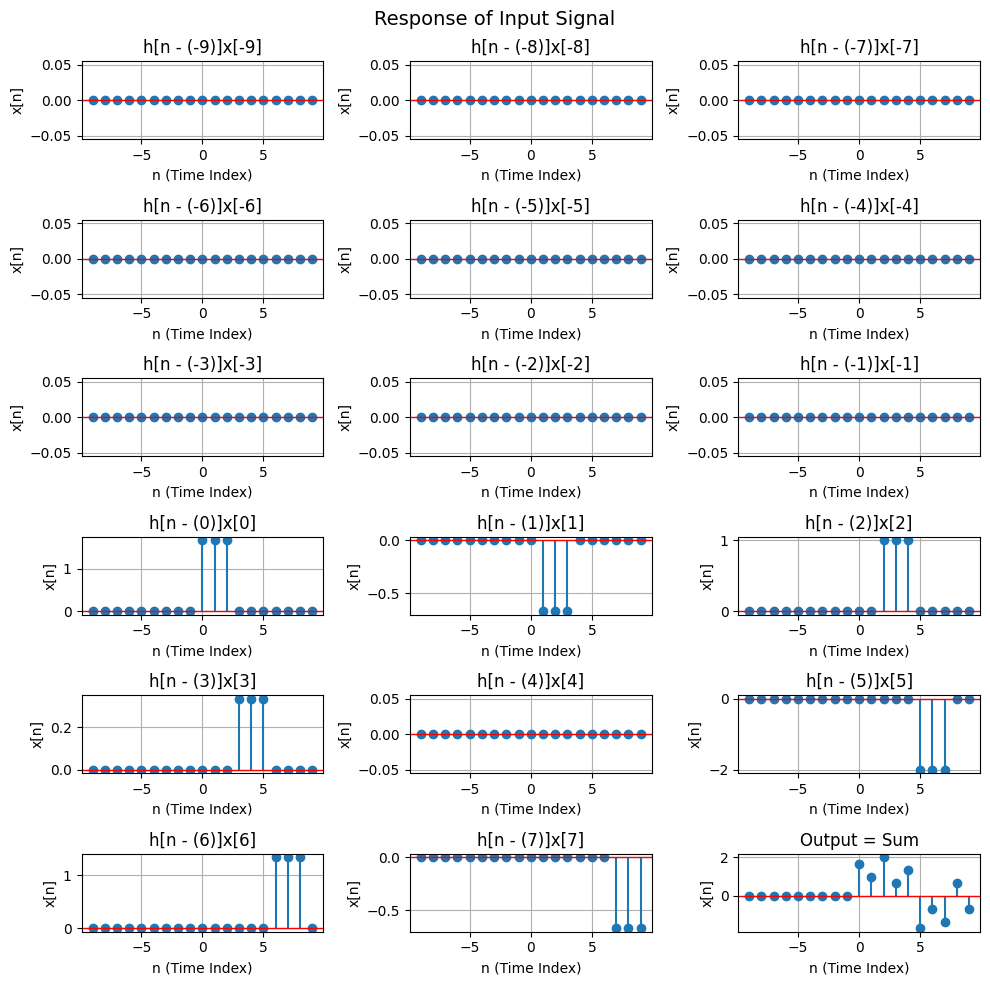

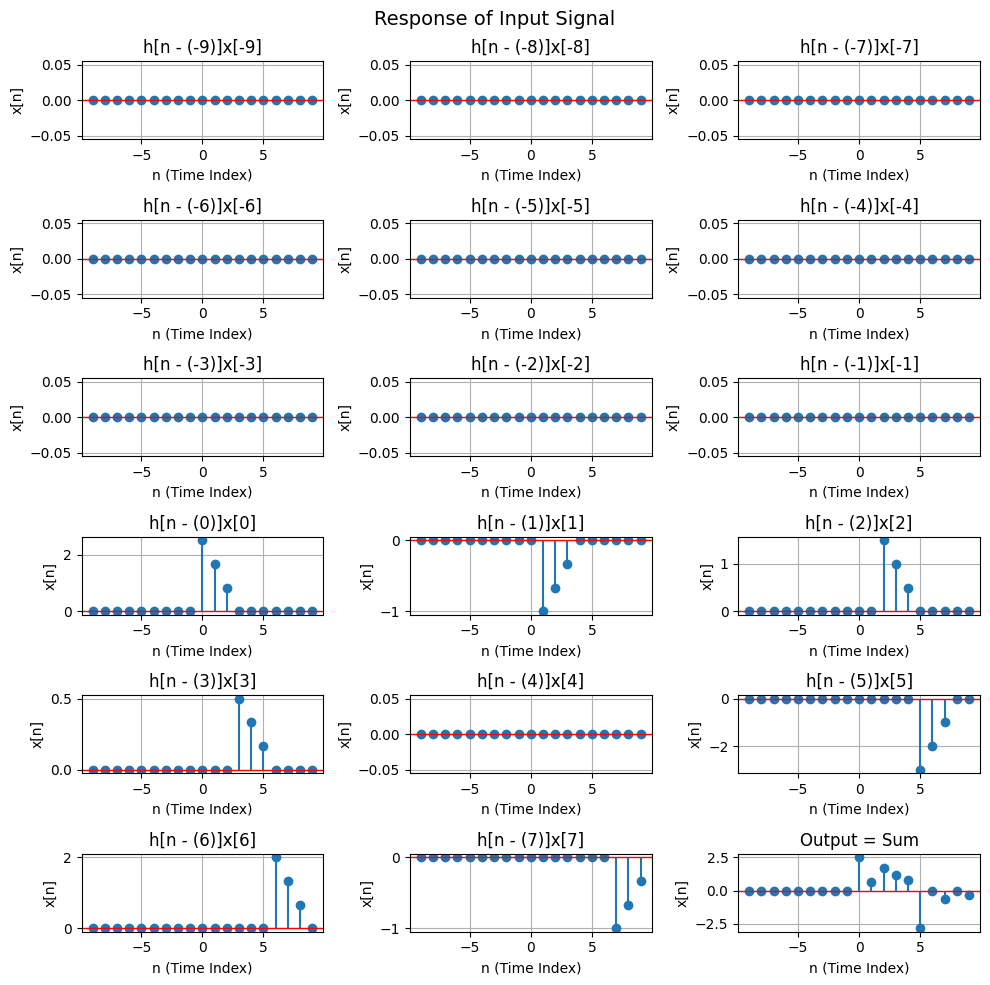

In [10]:
# Online B2
import numpy as np

# Stock Market Prices as a Python List
price_list = list(map(int, input("Stock Prices: ").split()))
n = int(input("Window size: "))

# price_list = [1, 2, 3, 4, 5, 6, 7, 8]
# n = 4

# Please determine uma and wma.

# Unweighted Moving Averages as a Python list
uma = []
# Weighted Moving Averages as a Python list
wma = []


INF = len(price_list)
input_signal = DiscreteSignal(INF)
for i,price in enumerate(price_list):
    input_signal.set_value_at_time(i,price)
# print(input_signal.values)

uma_response = DiscreteSignal(INF)
for i in range(n):
    uma_response.set_value_at_time(i,1/n)
# print(uma_response.values)

umalti = DiscreteLTI(uma_response)
uma = umalti.output(input_signal).values[INF+n-1:-1]

wma_response = DiscreteSignal(INF)
weights = np.zeros(n)
for i in range(n):
    weights[i] = (n-i)/((n*(n+1))/2)
# weighted_sum = np.sum(weights)
# print(weights)
# print(weighted_sum)
for i,weight in enumerate(weights):
    wma_response.set_value_at_time(i,weight)

# print(wma_response.values)

wmalti = DiscreteLTI(wma_response)
wma = wmalti.output(input_signal).values[INF+n-1:-1]

# input_signal_uw.INF + n -1: -1


# Print the two moving averages
print("Unweighted Moving Averages: " + ", ".join(f"{num:.2f}" for num in uma))
print("Weighted Moving Averages:   " + ", ".join(f"{num:.2f}" for num in wma))


# T1:
# 1 2 3 4 5 6 7 8
# 4
# 
# T2:
# 5 -2 3 1 0 -6 4 -2 1
# 3


[0.1 0.2 0.3 0.4]
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  2.  3.  4.  5.  6.  7. 84.  0.]
[0.   0.   0.   0.   0.   0.   0.   0.   0.25 0.25 0.25 0.25 0.   0.
 0.   0.   0.  ]
[0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.2 0.3 0.4 0.  0.  0.  0.  0. ]
Unweighted Moving Averages: 2.50, 3.50, 4.50, 5.50, 25.50
Weighted Moving Averages:   2.00, 3.00, 4.00, 5.00, 13.60


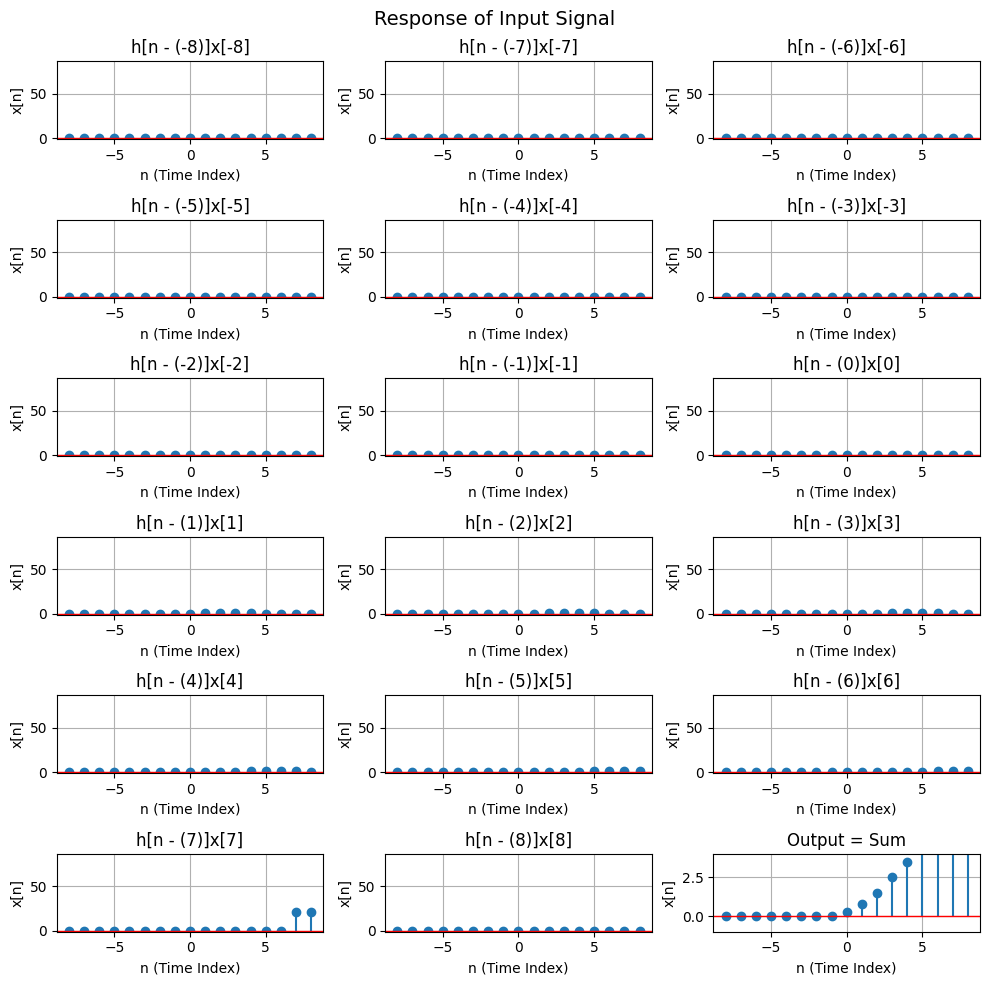

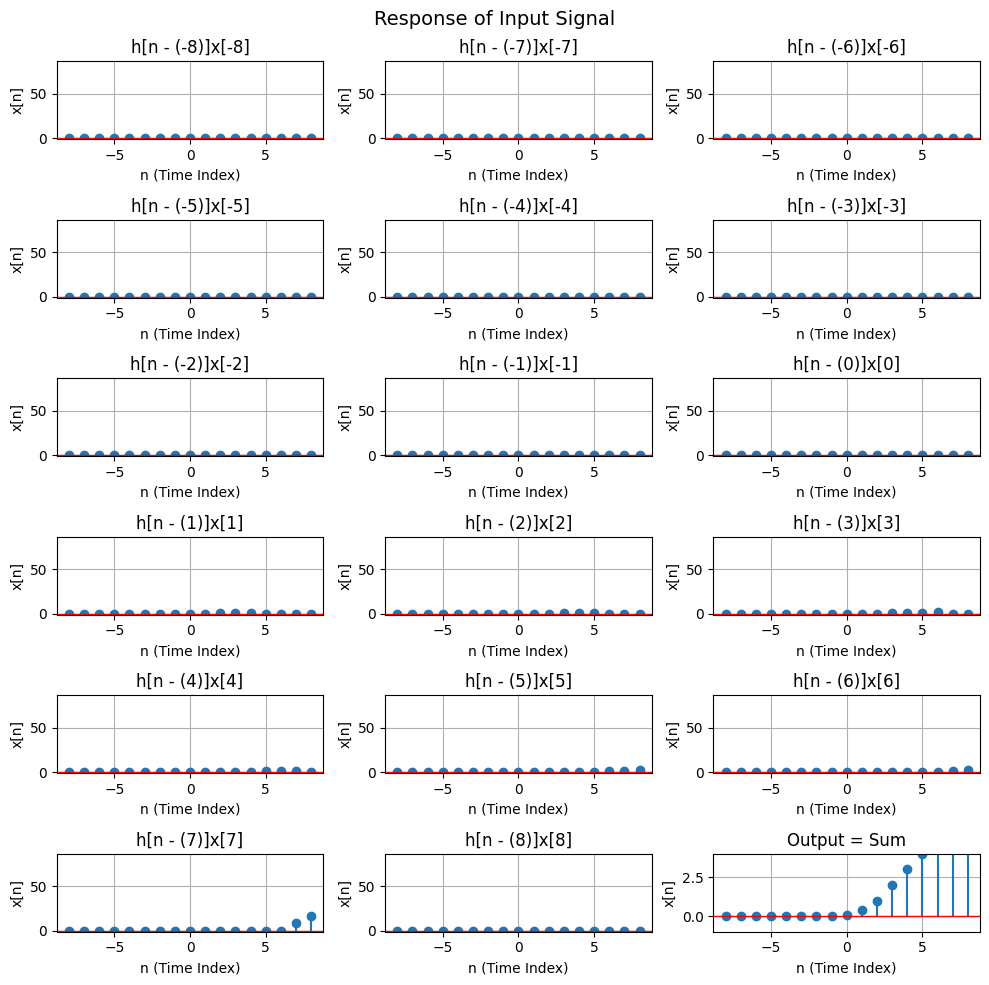

In [12]:
def main():
    # Input for first polynomial
    # Input for first polynomial
    

    # Stock Market Prices as a Python List
    price_list = list(map(int, input("Stock Prices: ").split()))
    n = int(input("Window size: "))

    # price_list = [1, 2, 3, 4, 5, 6, 7, 8]
    # n = 4

    impulse_signal = DiscreteSignal(len(price_list))

    for i in range(len(price_list)):
        impulse_signal.set_value_at_time(i, price_list[i])
    
    input_signal_uw = DiscreteSignal(len(price_list))

    for i in range(n):
        input_signal_uw.set_value_at_time(i, 1/n)
    
    input_signal_w = DiscreteSignal(len(price_list))

    weights = np.zeros(n)
    for i in range(n):
        weights[i] = (n-i)/((n*(n+1))/2)

    # weights = np.flip(weights)
    # weights = weights[::-1]
    print(weights)


    for i in range(n):
        input_signal_w.set_value_at_time(i, weights[i])


    print(impulse_signal.values)
    print(input_signal_uw.values)
    print(input_signal_w.values)

    lti_system = DiscreteLTI(input_signal_uw)

    uma= lti_system.output(impulse_signal)

    lti_system = DiscreteLTI(input_signal_w)
    wma = lti_system.output(impulse_signal)

    # Please determine uma and wma.

    # Unweighted Moving Averages as a Python list
    uma = uma.values[input_signal_uw.INF + n -1: -1]

    # Weighted Moving Averages as a Python list
    wma = wma.values[input_signal_w.INF + n -1: -1]

    #  Print the two moving averages
    print("Unweighted Moving Averages: " + ", ".join(f"{num:.2f}" for num in uma))
    print("Weighted Moving Averages:   " + ", ".join(f"{num:.2f}" for num in wma))



main()

# Ekta Reverse and arekta soja kore 

sum = 1 to n

i-> i/sum

In [3]:
# taking input
import numpy as np
val1 = int(input("Enter the value: "))
list1 = list(map(int,input("HEHE").split()))

val2 = int(input("Enter the Value2: "))
list2 = list(map(int,input("HEEHE").split(", ")))
a = np.array(list2)
print(a)

# np array to list
# list3 = a.tolist()

# np array size
# npsize = a.size

# solving image convolution

# np.convolve(input_signal,impulse_response,mode='full')
# np.convolve(input_signal,impulse_response,mode='same')

[1 2 3 4]
